# Supervised Learning - Logistic Regression Part 2

###This notebook introduces Classification metrics

In [0]:
#@title Preliminary Code
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression

X = np.linspace(0,1,100).reshape([-1,1])
Y = np.concatenate([np.random.choice([0, 1], size=(50,1), p=[14/16,2/16]),
                    np.random.choice([0, 1], size=(50,1), p=[2/16,14/16])])

log = LogisticRegression(solver='lbfgs')
log.fit(X,Y[:,0])
y_hat_log = log.predict_proba(X)

![alt text](https://www.norwegiancreations.com/wp-content/uploads/2018/10/cross_validation.png)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

In [0]:
X.shape

(100, 1)

In [0]:
X_train.shape

(80, 1)

In [0]:
y_train.shape

(80, 1)

In [0]:
X_test.shape

(20, 1)

In [0]:
y_test.shape

(20, 1)

Logistic Regression gives probability (continuous scale), but then we should decide how to treat those probabilites (bring to binary scale).

We define threshold for classification problem. By default we took threshold to be 0.5 e.g. if  probability is above 0.5 then we would classify it as 1 and if it is lower than 0.5 than we would classify it as 0. 

We might need to be more risk averse and classify something 1 if only it has 95% probability or more and vica versa. So we can set some thresholds for predicitons.

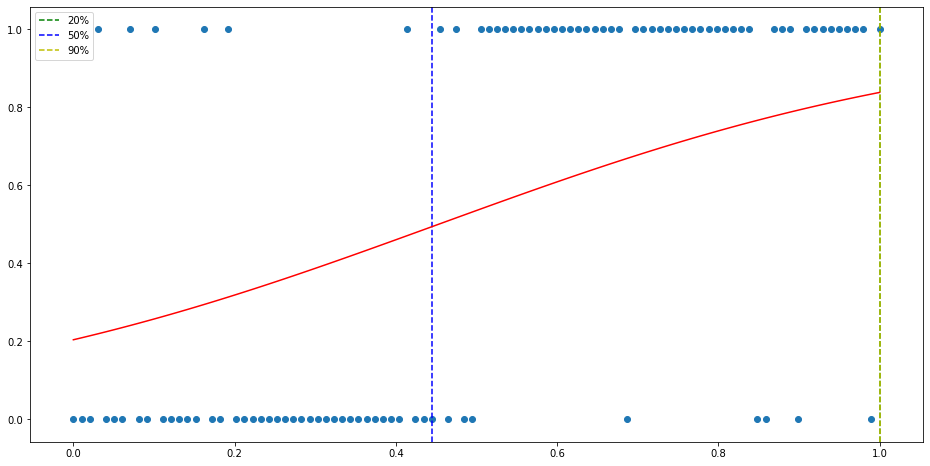

In [0]:
#Plot Logistic Regression prediction result with a red line
plt.figure(figsize = (16,8))
plt.scatter(X,Y)

twenty = (y_hat_log[:,1]<=0.2).sum()-1
plt.axvline(X[twenty],c = 'g',linestyle = '--',label = '20%')

fifty = (y_hat_log[:,1]<=0.5).sum()-1
plt.axvline(X[fifty],c = 'b',linestyle = '--',label = '50%')

ninety = (y_hat_log[:,1]<=0.9).sum()-1
plt.axvline(X[ninety],c = 'y',linestyle = '--',label = '90%')
plt.plot(X,y_hat_log[:,1],'r')
plt.legend()

plt.show()

Basic terms related to Confusion matrix

$True-Negatives (TN): [0,0]:$ Correctly Predicted Negative Values

$True-Positives (TP): [1,1]:$ Correctly Predicted Positive Values

$False-Negatives (FN): [1,0]:$ Incorrectly Prediced Negative Values, but they're Positive (Type 2 error, Miss)

$False-Positives (FP): [0,1]:$  Incorrectly Prediced Positive Values, but they're Negative (Type 1 error, False alarm)


$Accuracy : \frac{TP+TN}{Total}$ . Describes overall, how often the classifier correct.

In [0]:
threshold = 0.4

In [0]:
temp_d = np.array([X,Y,y_hat_log[:,1].reshape(100,1)]).T.squeeze()
data = pd.DataFrame(temp_d,columns = ['X','Y',"Predict"])
conf_matr = []

for i in range(len(data)):
  if data["Y"][i] == 1 and data["Predict"][i] >= threshold:
    #print("TP")
    conf_matr.append("TP")
  elif data["Y"][i] == 0 and data["Predict"][i] <= threshold:
    #print("TN")
    conf_matr.append("TN")
  elif data["Y"][i] == 1 and data["Predict"][i] < threshold:
    #print("FN")
    conf_matr.append("FN")
  elif data["Y"][i] == 0 and data["Predict"][i] > threshold:
    #print("FP")
    conf_matr.append("FP")

data["Conf_Value"] = conf_matr


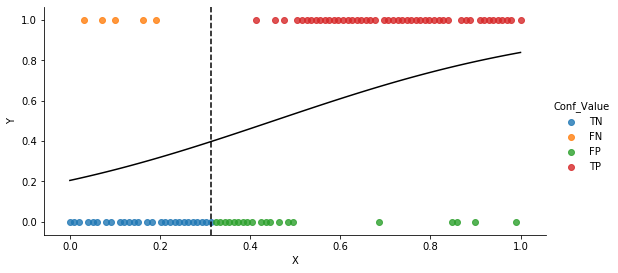

In [0]:
sns.lmplot(x="X", y="Y", data=data,
           fit_reg=False, hue='Conf_Value',
           height = 3.9, aspect=2)

threshold_line = (data["Predict"]<=threshold).sum()-1
plt.axvline(X[threshold_line],c = 'black',linestyle = '--',label = '50%')

plt.plot(X,y_hat_log[:,1],'black')
plt.show()

In [0]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y, data['Predict']>threshold)

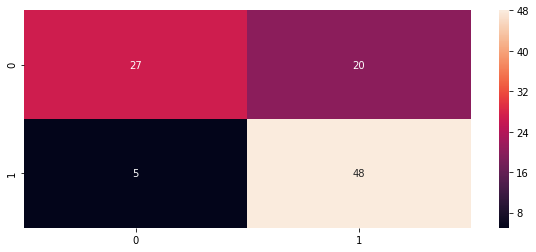

In [0]:
plt.figure(figsize = (10,4))
heat_map = sns.heatmap(conf_matrix, annot=True, fmt="d")
#heat_map.get_ylim()
heat_map.set_ylim(2,0)
plt.show()

![alt text](http://www.info.univ-angers.fr/~gh/Predipath/confusion.png)

In [0]:
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

acc = (TP+TN)/(TP+TN+FP+FN)

acc

0.75

Accuracy is often **NOT** an apprpriate evaluation metric for imbalanced data problems

Precision / Recall capture different characteristics of the Classifier

![](https://miro.medium.com/max/1872/1*pOtBHai4jFd-ujaNXPilRg.png)

In [0]:
from sklearn.metrics import classification_report
print(classification_report(Y, data["Predict"]>threshold))

              precision    recall  f1-score   support

           0       0.84      0.57      0.68        47
           1       0.71      0.91      0.79        53

    accuracy                           0.75       100
   macro avg       0.77      0.74      0.74       100
weighted avg       0.77      0.75      0.74       100



$Precision : \frac{TP}{TP+FP}$ - it's a measure of a classifier's exactness

$Recall(True Positive Rate): \frac{TP}{TP+FN}$ - it's measure of a classifier's completeness. A low recall indicates many False Negatives.

$f1$ $score : 2*\frac{precision*recall}{precision+recall}.$ - it's the balance between the Precision and the Recall.

####**Warm Up exercise**

Define a function which will take the threshold as an input and calculates the corresponding Precision and Recall. 

Take the threshold step 0.1 and change it from 0 to 1 and plot the Precision Recall curve for each threshold value

In [0]:
temp_d = np.array([X,Y,y_hat_log[:,1].reshape(100,1)]).T.squeeze()
data = pd.DataFrame(temp_d,columns = ['X','Y',"Predict"])

conf_matr_list = []

for threshold in np.arange(0, 1, 0.1):
  conf_matr = []
  for i in range(len(data)):
    if data["Y"][i] == 1 and data["Predict"][i] >= threshold:
      #print("TP")
      conf_matr.append("TP")
    elif data["Y"][i] == 0 and data["Predict"][i] <= threshold:
      #print("TN")
      conf_matr.append("TN")
    elif data["Y"][i] == 1 and data["Predict"][i] < threshold:
      #print("FN")
      conf_matr.append("FN")
    elif data["Y"][i] == 0 and data["Predict"][i] > threshold:
      #print("FP")
      conf_matr.append("FP")
  conf_matr_list.append(conf_matr)

In [0]:
conf_counts = []
for i in conf_matr_list:
  counts = pd.Series(i)
  counts = dict(counts.value_counts())
  conf_counts.append(counts)

In [0]:
def calc_precision_recall(dict):
  key_list = ['TP', 'FP', 'TN', 'FN']

  for key in key_list:
    if key not in dict.keys():
      dict[key] = 0
  
  if dict['TP'] == 0:
    precision = 0
    recall = 0
  else:
    precision = dict['TP'] / dict['TP'] + dict ['FP']
    recall = dict['TP'] / dict['TP'] + dict ['FN']

  return precision, recall

In [0]:
prec_recall_list = []

for i in conf_counts:
  prec_recall_list.append(calc_precision_recall(i))

In [0]:
prec_list = [item[0] for item in prec_recall_list]
recall_list = [item[1] for item in prec_recall_list]

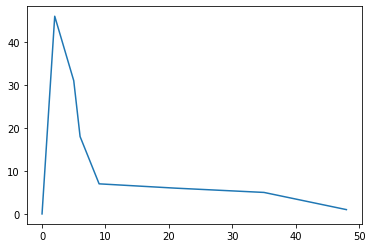

In [0]:
plt.plot(prec_list, recall_list)

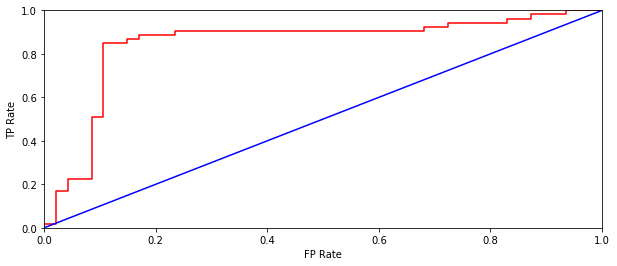

In [0]:
from sklearn.metrics import roc_curve, roc_auc_score

fp_rate,tp_rate, thresholds = roc_curve(Y, data["Predict"])
plt.figure(figsize = (10,4))
plt.plot(fp_rate, tp_rate,'r')
plt.plot([0, 1], [0, 1],'b')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.xlabel('FP Rate')
plt.ylabel('TP Rate')

plt.show()

$ROC$ $curve$

Plotted the true positive rate against the false positive rate at various threshold settings

The blue line is a random classifier & the red one is our classifier

A good classifier stays as far away from the random line as possible (toward the top-left corner)

In [0]:
# Area Under the ROC Curve - the probability that a classifier will
# rank a randomly chosen positive instance higher than a randomly chosen negative one
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(Y,data["Predict"])
print(auc)

0.8474508229626656
